A few days ago I was met with the task of producing static dashboards for providing a visual overview of some calcium fluorescence data corresponding to neural electrical potenital in 120 C Elegans neurons. 

As I experimented with different graph formats and decided which ones best represent the data, I was ready to start producing one png image laying out the various graphs on an invisible grid. 

In truth, I only had 5 graphs to layout and it was easy to determine the dimensions of my grid needed to be $3*2$ to minimize the number of excess cells but still fitting all the graphs. 

My natural tendency to consider how this solution would scale led me to a deeper and much more interesting problem, being how to find two factors whose product approaches or is equivalent to a given $n$ and whose difference is as small as possible. This will enable me to determine how best to layout on a grid a given number of symbols where the grid is as squarelike as possible. 

In truth, this layout problem I was trying to solve is an applied instance of the abstract mathematical problem: 

> Given a set of symbols $Q$ of cardinality $n$,find $(x,y)\in\mathbb{N^2}$ to minimize $xy-n>0$ and $|x-y|$

The obvious brute-force approach would be the $O(N^2)$ solution of comparing all $y_i$ and $y_j$, where  $y=(x_1,...,x_i,...,x_n)$ and minimizing first $y_iy_j-n$ and then $y_i-y_j$. 

Of course the problem is more nuanced than this simple solution makes it out to be. We can find a much more efficient solution if we look more closely. 

We know all the factors of a given number $n$ lie along the curve $y=n/x$. Given we are finding some optimal pairing of some numbers, let us look at the distribution of factor pairs for $n=30$. 

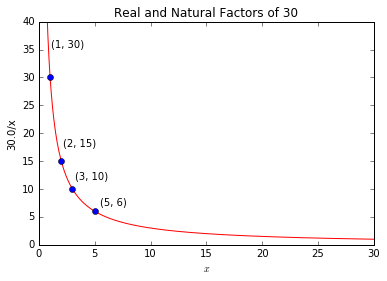

In [61]:
N = 30.0

import numpy as np
import matplotlib.pyplot as plt

# Plotting 30/x
xs = np.linspace(0,N, num=N*10).tolist()
y = [   N/x if x >0 else 0 for x in xs]

# Plotting the factors of 30: 
factors = np.array([(i, N / i) for i in range(1, int(N**0.5)+1) if N % i == 0])

fx = factors[:,0]
fy = factors[:,1]

plt.ylim((0,40))
plt.plot(xs, y,'r')
plt.plot(fx,fy, 'ob')

plt.xlabel('$x$')
plt.ylabel('%s/x'%N)

plt.title('Real and Natural Factors of %s'%int(N))

for xy in factors:
    xy = (int(xy[0]), int(xy[1]))
    plt.annotate('(%s, %s)'%xy, xy = xy, textcoords='offset points')
    

Once we have the function and factors graphed, we see our solution lies at the intersection of $f(x)=\frac{n}{x}$ and $f(x)=x$, i.e. $y=floor(\sqrt{n})$ and $x=ceil(\sqrt{n})$

It turns out this was a very simple issue. 




